In [1]:
#Importing pandas to analayze excel file
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.__version__

'1.1.3'

In [2]:
# Assigning excel file to a dataframe
df = pd.read_csv('Employee_Salary_Compensation.csv')
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 678524
Number of Columns: 22


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [5]:
df.dropna(axis = 0, how = 'all', inplace = True)
df.shape

(678524, 22)

#### No rows have all values as Null

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678524 entries, 0 to 678523
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  678524 non-null  int64  
 1   Job Family Code          678524 non-null  object 
 2   Job Code                 678524 non-null  object 
 3   Year Type                678524 non-null  object 
 4   Year                     678524 non-null  int64  
 5   Organization Group       678524 non-null  object 
 6   Department Code          678522 non-null  object 
 7   Department               678522 non-null  object 
 8   Union Code               678345 non-null  float64
 9   Union                    678345 non-null  object 
 10  Job Family               678524 non-null  object 
 11  Job                      678519 non-null  object 
 12  Employee Identifier      678524 non-null  int64  
 13  Salaries                 678524 non-null  float64
 14  Over

#### Looks like some columns have null values. So, we try to find the null values in each column

In [7]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 179
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
df[df['Department'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
548799,7,8300,8300,Fiscal,2017,General City Responsibilities,NaN,NaN,790.0,"SEIU, Local 1021, Misc",Correction & Detention,Sheriff's Cadet,37042591,49630.50,15016.51,4575.73,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24
548800,7,Q000,Q003,Fiscal,2017,General City Responsibilities,NaN,NaN,911.0,POA,Police Services,Police Officer 2,37069439,116189.62,40990.09,2260.08,159439.79,20076.66,14515.01,2724.05,37315.72,196755.51


In [9]:
df[df['Department Code'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
548799,7,8300,8300,Fiscal,2017,General City Responsibilities,NaN,NaN,790.0,"SEIU, Local 1021, Misc",Correction & Detention,Sheriff's Cadet,37042591,49630.50,15016.51,4575.73,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24
548800,7,Q000,Q003,Fiscal,2017,General City Responsibilities,NaN,NaN,911.0,POA,Police Services,Police Officer 2,37069439,116189.62,40990.09,2260.08,159439.79,20076.66,14515.01,2724.05,37315.72,196755.51


#### Looks like both are same records so we drop them from the dataframe

In [10]:
df = df.dropna(axis=0, subset=['Department Code','Department'])
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 678522
Number of Columns: 22


In [11]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              0
Department                   0
Union Code                 179
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [12]:
df[df['Job'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
197683,4,0900,2246,Calendar,2017,Community Health,DPH,Public Health,351.0,"Municipal Exec Assoc, Misc",Management,NaN,37303832,56887.83,0.0,27049.42,70412.54,10382.10,8388.41,5633.01,24403.52,94816.06
535421,4,0900,2246,Fiscal,2017,Community Health,DPH,Public Health,351.0,"Municipal Exec Assoc, Misc",Management,NaN,37303832,120426.76,0.0,0.00,120426.76,21994.01,17084.16,9237.63,48315.80,168742.56
542571,5,2600,2652,Fiscal,2017,Culture & Recreation,REC,Recreation And Park Commission,250.0,"SEIU, Local 1021, Misc",Dietary & Food,NaN,36938110,6455.33,0.0,0.00,6455.33,0.00,0.00,501.03,501.03,6956.36
544862,5,3300,3320,Fiscal,2017,Culture & Recreation,REC,Recreation And Park Commission,856.0,"Teamsters, Local 856, Multi",Park & Zoo,NaN,37352733,2096.80,0.0,24381.20,14287.40,390.21,383.32,1119.51,1893.04,16180.44
577950,4,0900,2246,Fiscal,2018,Community Health,DPH,Public Health,351.0,"Municipal Exec Assoc, Misc",Management,NaN,37303832,0.00,0.0,27049.42,13524.71,0.00,0.00,1034.64,1034.64,14559.35


In [13]:
# Assigning similar jobs based on job code
mapping = dict(df.dropna()[['Job Code', 'Job']].values)
df['Job'] = df['Job'].fillna(df['Job Code'].map(mapping))
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              0
Department                   0
Union Code                 179
Union                      179
Job Family                   0
Job                          0
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [14]:
df[df['Union'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
144675,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,10940,25998.00,1732.82,1454.07,29184.89,5008.11,3599.89,2287.72,10895.72,40080.61
144676,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,12058,76952.70,11617.41,6410.37,94980.48,15046.48,10799.68,7618.56,33464.72,128445.20
144677,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,16049,37882.80,1351.08,3552.62,42786.50,7324.09,5245.56,3386.34,15955.99,58742.49
144678,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,16413,39929.70,9355.48,4295.87,53581.05,7977.73,5656.98,4358.97,17993.68,71574.73
144679,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,1680,32969.70,2844.76,2010.33,37824.79,6341.53,4628.44,3098.15,14068.12,51892.91
144680,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,18601,7194.01,0.00,562.04,7756.05,1443.40,1028.54,638.13,3110.07,10866.12
144681,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,2005,17626.21,834.82,1349.21,19810.24,3536.07,2520.06,1561.30,7617.43,27427.67
144682,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,20191,63627.20,8156.76,7554.91,79338.87,12544.21,10851.11,6071.50,29466.82,108805.69
144683,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,22792,18941.40,1129.46,1142.09,21212.95,3664.40,2622.78,1683.97,7971.15,29184.10
144684,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,24302,27504.00,4787.81,4237.50,36529.31,5478.12,4628.44,2894.66,13001.22,49530.53


There is no way we can impute the union code values without union name or vice versa
Hence we remove these column from the dataset.

In [15]:
df = df[df['Union'].notna()]

In [16]:
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 678343
Number of Columns: 22


In [17]:
df.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [18]:
#Removing unnecessary columns
df.drop(['Union Code','Job Family Code','Job Code','Organization Group Code', 'Department Code'], axis=1, inplace=True)
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


#### Here we see that some of the columns have negative values and this cannot happen

In [19]:
indexNames = df[(df['Total Compensation'] <= 0.0) | (df['Total Salary'] <= 0.0)].index
df.drop(indexNames , inplace=True)
df.shape

(677659, 17)

In [20]:
df.describe()

,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,677659.000000,6.776590e+05,677659.000000,677659.000000,677659.000000,677659.000000,677659.000000,677659.000000,677659.000000,677659.000000,677659.000000
mean,2016.542048,1.983590e+07,70713.512788,5599.481628,3874.691954,79966.537822,14092.658215,10128.624110,5103.611203,29324.893528,109291.431350
std,2.268850,1.970509e+07,48158.771490,13331.752929,8635.833740,56197.652425,10387.430021,5844.711993,3746.592957,18187.616816,73013.113725
min,2013.000000,0.000000e+00,-18437.730000,-12308.660000,-19131.100000,0.010000,-29629.210000,-1288.180000,-10636.500000,-19411.610000,0.010000
25%,2015.000000,2.876900e+04,30752.925000,0.000000,0.000000,33708.410000,5116.485000,4969.800000,1946.570000,12608.125000,47183.925000
50%,2017.000000,3.665604e+07,69008.600000,0.000000,724.500000,76171.070000,14261.230000,12512.550000,4972.030000,33123.030000,109484.710000
75%,2019.000000,3.767604e+07,101950.330000,4443.035000,4409.070000,114317.530000,20627.655000,14395.200000,7624.845000,41578.815000,156694.800000
max,2020.000000,4.609664e+07,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


#### Number of jobs in each department

In [21]:
No_of_jobs_each_department= df.groupby('Department')['Job'].nunique().sort_values(ascending=False) 
No_of_jobs_each_department

Department
DPH Public Health                 286
MTA Municipal Transprtn Agncy     278
Public Health                     277
Public Utilities Commission       263
AIR Airport Commission            261
Airport Commission                251
Municipal Transportation Agcy     251
DPW GSA - Public Works            182
Department Of Public Works        181
ADM Gen Svcs Agency-City Admin    180
Administrative Services           177
HSA Human Services Agency         155
PUB Public Utilities Bureaus      149
REC Recreation & Park Commsn      146
WTR Water Enterprise              145
Recreation And Park Commission    142
Human Services                    141
PRT Port                          128
Port                              124
POL Police                        123
HHP Hetch Hetchy Water & Power    121
WWE Wastewater Enterprise         115
Police                            113
Public Library                     89
DT GSA - Technology                86
LIB Public Library                 83
H

#### Plotting the top ten employers in San Fransisco department wise

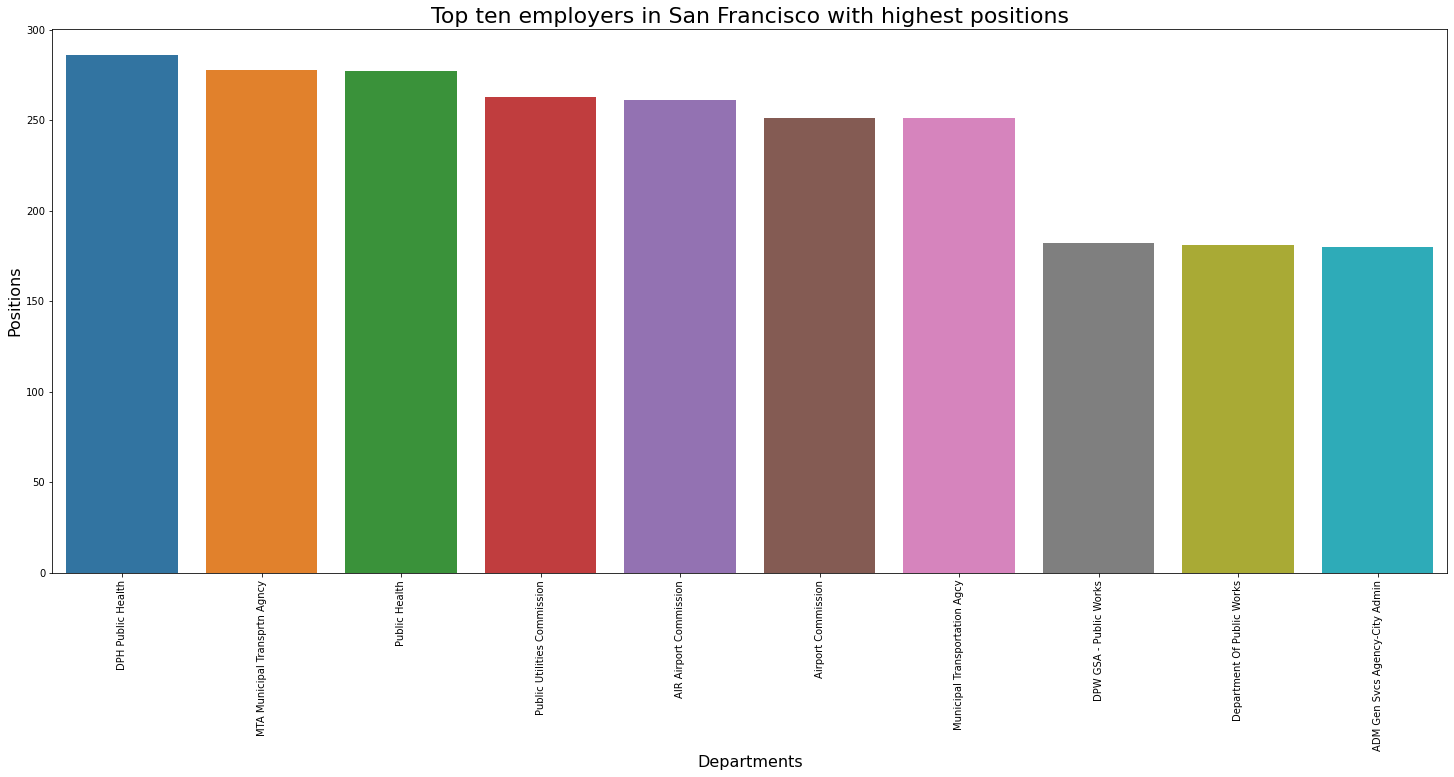

In [22]:
plt.figure(figsize=(25,10))
sns.barplot(y=No_of_jobs_each_department.head(10),x=No_of_jobs_each_department.head(10).index.values)
plt.title('Top ten employers in San Francisco with highest positions',fontsize=22)
plt.xticks(rotation = 90);
plt.xlabel('Departments',fontsize=16)
plt.ylabel('Positions',fontsize=16)
plt.show()

#### Median Total Compensation for each job role

In [23]:
#Median Total compensation for each job
jobs_highest_total_comp = df.groupby(['Job'])['Total Compensation'].median().sort_values(ascending=False)
jobs_highest_total_comp

Job
Chief Investment Officer                    656738.835
Managing Director                           544938.685
Physician Administrator, DPH                542805.850
Director                                    463707.750
Sup Psychiatric Physician Spec              451024.450
Chief, Fire Department                      428507.960
Chief of Police                             415850.760
Chief Of Police                             414791.030
Assistant Chief of Police                   410817.960
Administrator, DPH                          406195.690
Gen Mgr, Public Trnsp Dept                  405050.340
Executive Contract Employee                 395176.115
Dept Head V                                 394131.660
Manager, Dept Public Health                 381848.680
Sheriff                                     378956.050
Mayor                                       377576.300
Administrator, Department Of Public Heal    376821.290
Dep Chf of Dept (Fire Dept)                 374891.945
Contro

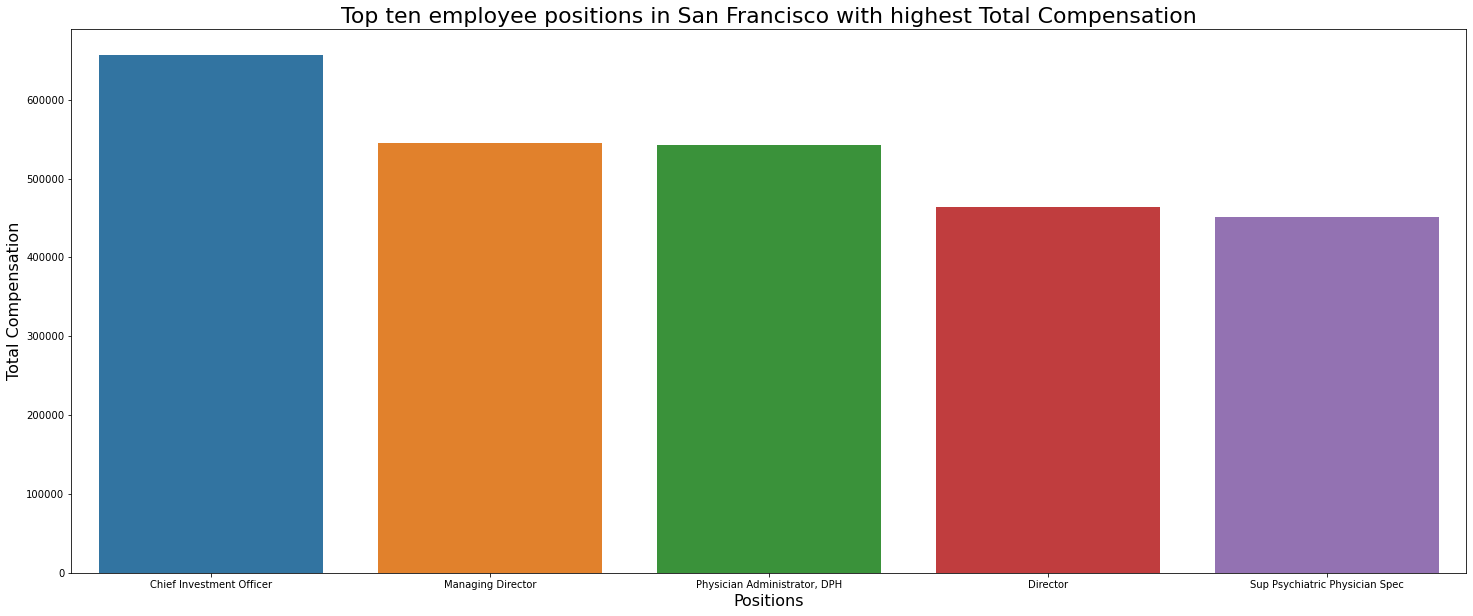

In [24]:
#Plotting top 5 jobs with highest total compensation
plt.figure(figsize=(25,10))
sns.barplot(y=jobs_highest_total_comp.head(5),x=jobs_highest_total_comp.head(5).index.values)
plt.title('Top ten employee positions in San Francisco with highest Total Compensation',fontsize=22)
plt.xlabel('Positions',fontsize=16)
plt.ylabel('Total Compensation',fontsize=16)
plt.show()

In [25]:
#median for Total Salary for each job role
jobs_highest_total_salary = df.groupby(['Job'])['Total Salary'].median().sort_values(ascending=False)
jobs_highest_total_salary 

Job
Chief Investment Officer                    521222.470
Managing Director                           434077.545
Physician Administrator, DPH                428545.000
Director                                    361808.610
Sup Psychiatric Physician Spec              348187.690
Chief, Fire Department                      339579.120
Chief Of Police                             327972.860
Chief of Police                             325619.330
Assistant Chief of Police                   323397.630
Administrator, DPH                          318521.245
Gen Mgr, Public Trnsp Dept                  305307.890
Dept Head V                                 303669.150
Executive Contract Employee                 301082.035
Dep Chf of Dept (Fire Dept)                 298543.555
Manager, Dept Public Health                 294666.020
Controller                                  290366.610
Asst Chf Of Dept (Fire Dept)                288092.330
Mayor                                       285931.405
Asst C

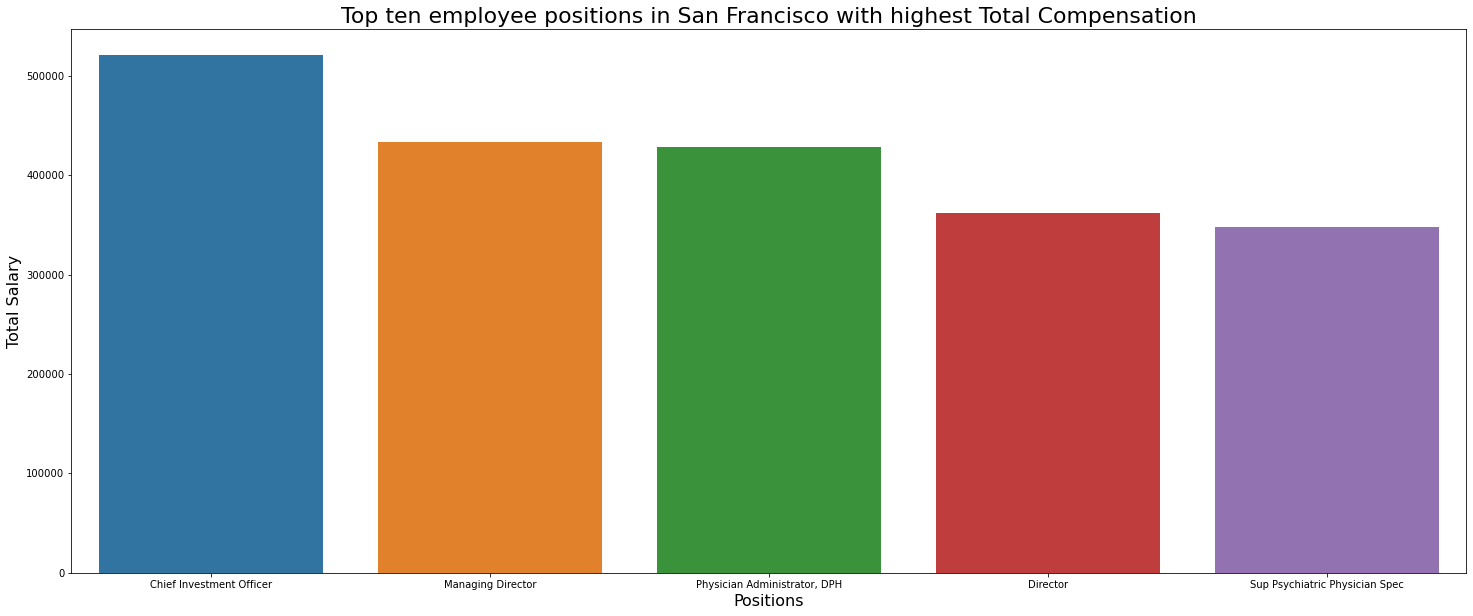

In [26]:
#Plotting top 5 jobs with highest total salary medians
plt.figure(figsize=(25,10))
sns.barplot(y=jobs_highest_total_salary .head(5),x=jobs_highest_total_salary .head(5).index.values)
plt.title('Top ten employee positions in San Francisco with highest Total Compensation',fontsize=22)
plt.xlabel('Positions',fontsize=16)
plt.ylabel('Total Salary',fontsize=16)
plt.show()

In [27]:
#Median of Total benifits for each job role
jobs_highest_total_benefits = df.groupby(['Job'])['Total Benefits'].median().sort_values(ascending=False)
jobs_highest_total_benefits

Job
Chief Investment Officer                    132638.925
Sheriff                                     118064.730
Physician Administrator, DPH                113604.320
Managing Director                           109542.970
Director                                    101698.890
Sup Psychiatric Physician Spec               98030.200
Gen Mgr, Public Trnsp Dept                   93783.050
Administrator, DPH                           92638.900
Chief, Fire Department                       91747.455
Dept Head V                                  90791.370
Executive Contract Employee                  90368.075
Chief of Police                              89451.985
Administrator, Department Of Public Heal     89226.980
Chief Deputy Sheriff (PERS)                  88297.390
Controller                                   87870.545
Assistant Chief of Police                    86831.425
Court Executive Officer                      86612.480
Manager, Dept Public Health                  86519.810
Chf Pr

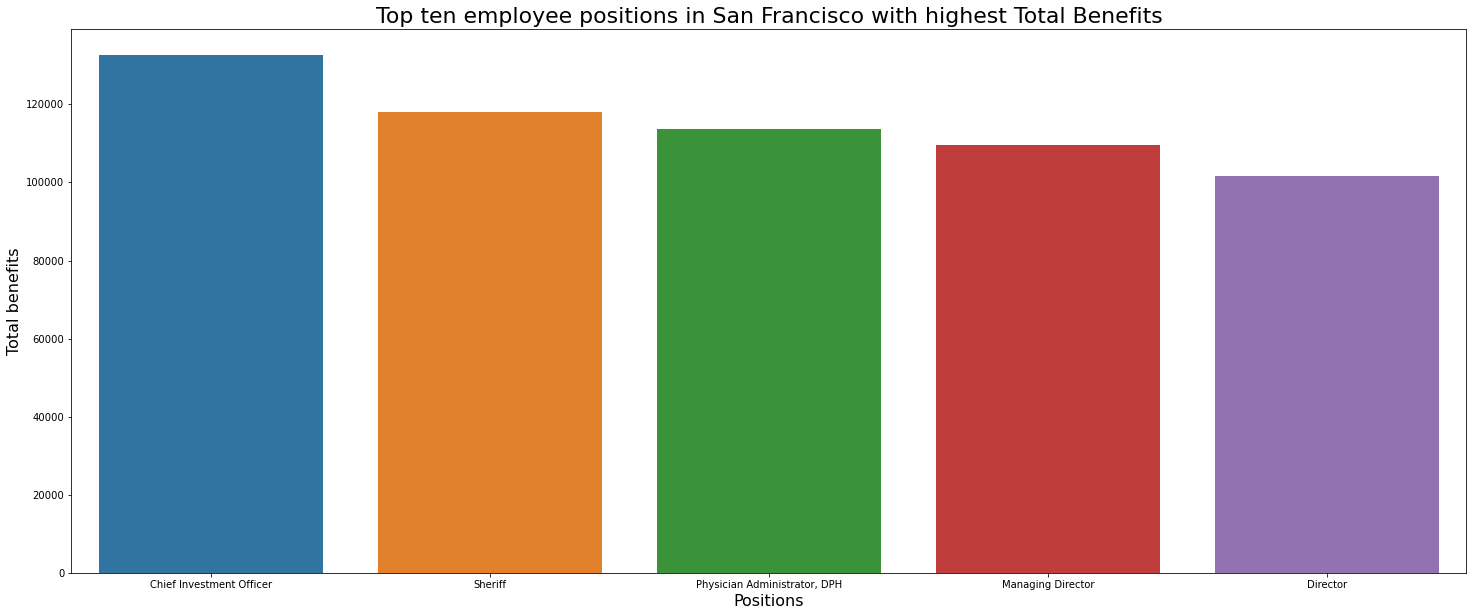

In [28]:
#Plotting top 5 jobs with highest total benefits medians
plt.figure(figsize=(25,10))
sns.barplot(y=jobs_highest_total_benefits .head(5),x=jobs_highest_total_benefits.head(5).index.values)
plt.title('Top ten employee positions in San Francisco with highest Total Benefits',fontsize=22)
plt.xlabel('Positions',fontsize=16)
plt.ylabel('Total benefits',fontsize=16)
plt.show()

1. Eventhough sheriff's do not have high compensation they have good benifits may be considering the risk of their position
2. Seems like Chief Investement officer, Physician adminstrator, managing director and director are having high total compensation including salary and benefits.

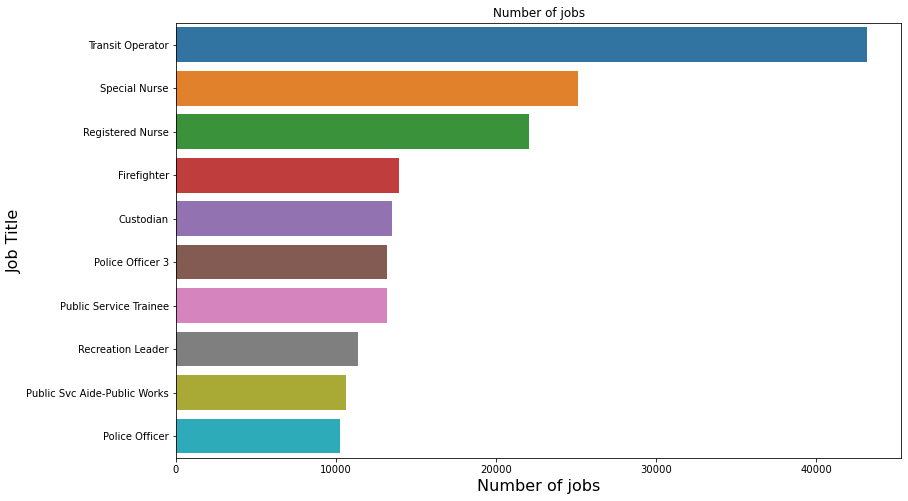

In [29]:
#Top 10 sectors for SF salary analysis
plt.figure(figsize=(13,8))
sectors = df['Job'].value_counts()[0:10]
sns.barplot(y=sectors.index, x=sectors.values)
plt.xlabel('Number of jobs', fontsize=16)
plt.ylabel("Job Title", fontsize=16)
plt.title("Number of jobs")
plt.show();

In [30]:
#calculating the mean Total Benefits for each of the job titles as we cleary saw that there are some differences in the benifits 
#of some roles
df.Job = df.Job.str.lower()
df_1 = df[['Job', 'Total Benefits']]
pivoted_data = df_1.pivot_table('Total Benefits', index='Job' , aggfunc=np.mean)
sorted_salaries = pivoted_data.sort_values(by='Total Benefits', ascending= False)
print(sorted_salaries[:10])

                                Total Benefits
Job                                           
chief investment officer         112530.799444
physician administrator, dph     108172.113077
managing director                103184.846842
director                          96114.358571
administrator, dph                94692.900000
sup psychiatric physician spec    94059.596364
sheriff                           89251.613333
controller                        88514.096250
chief, fire department            88441.092778
dept head v                       86880.761183


#### What is the average Total salary of all employees per year

In [31]:
#What is the average Total salary of all employees per year?
df.groupby('Year').mean()['Total Salary']

Year
2013    72114.403176
2014    70335.896745
2015    71043.252890
2016    74499.223322
2017    82836.469133
2018    86029.511519
2019    86835.225059
2020    95472.231358
Name: Total Salary, dtype: float64

#### Distribution of Total Compensation for top 10 jobs across years

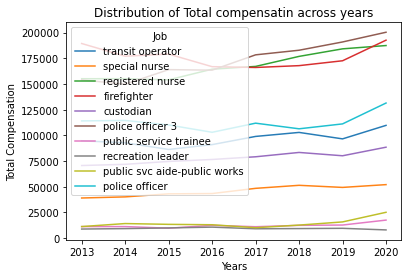

In [32]:
common_jobs = list(df['Job'].value_counts(sort=True).keys()[:10])
df2 = pd.pivot_table(df,index = 'Year', columns = 'Job' , values = 'Total Compensation')
df2.loc[:,common_jobs].plot(alpha=10)
plt.title('Distribution of Total compensatin across years')
plt.xlabel('Years');
plt.ylabel('Total Compensation');
plt.show();

#### Corelation Heat map

<AxesSubplot:>

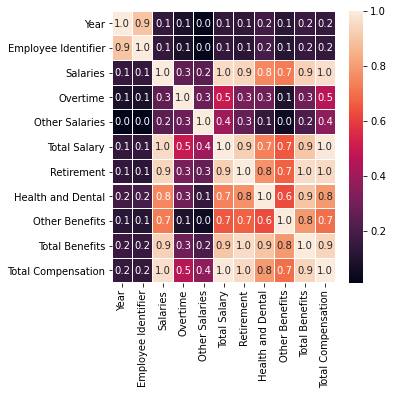

In [33]:
#Corelation heat map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt= '.1f',ax=ax)

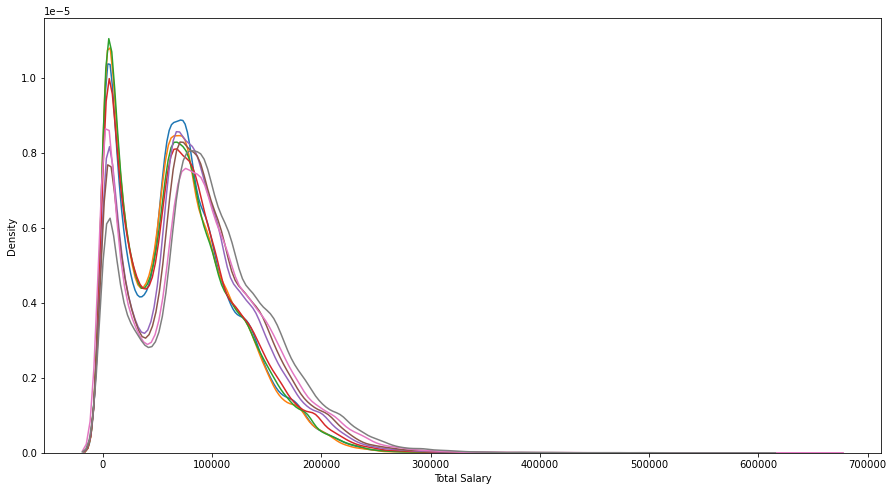

In [34]:
# Density plot of Total salary by year from 2014-2020
plt.figure(figsize=(15,8))
for col in list(df['Year'].unique()):
    sns.kdeplot(df['Total Salary'][df['Year'] == col], label = col)

Above plotted is the density graph for salaries across different years.

#### Scatter plot for Total benefits vs Total Salary

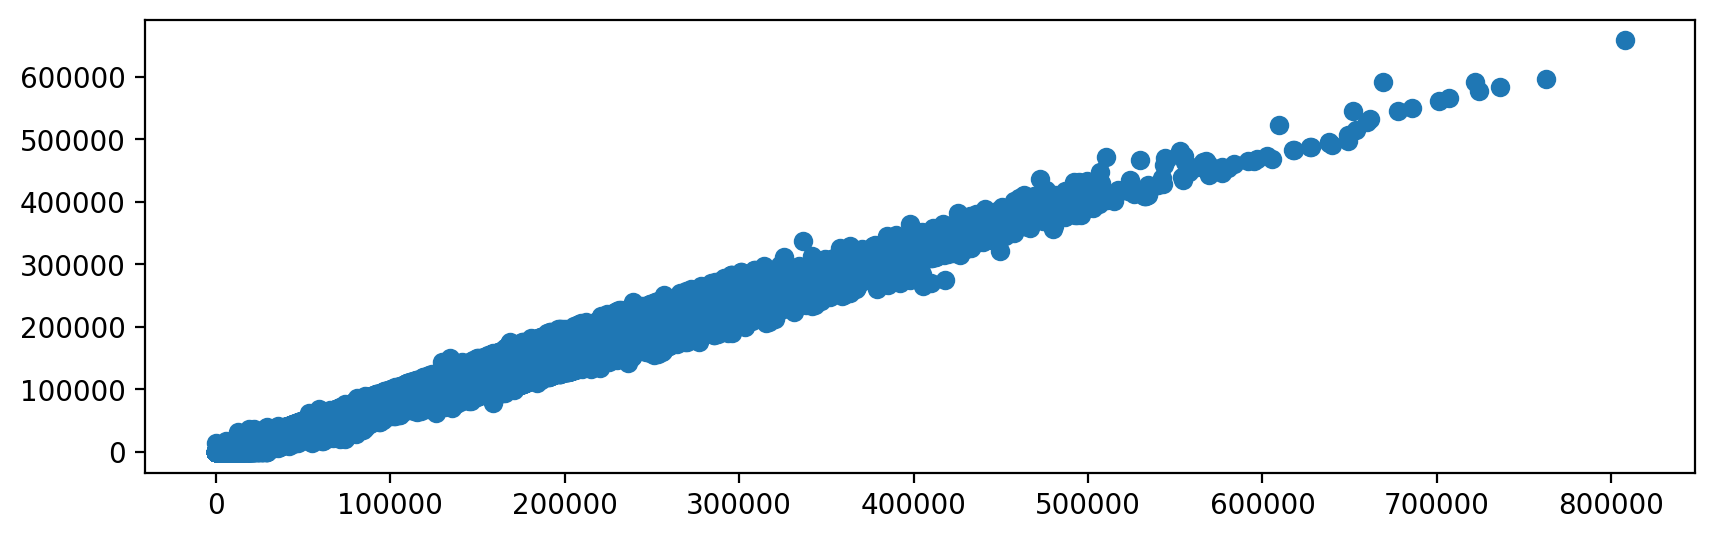

In [35]:
plt.figure(figsize=(10,3),dpi=200)
plt.scatter(df['Total Compensation'],df['Total Salary'])
plt.show()

Looks like total compensation and total salary are linear.

We found various factors influencing total compensation. Median of all the salaries across all the jobs.
Highest number of employees in a department are from DPH Public Health and least jobs are from LLB Law Library.
Highest median total compensation for a job is for the role Chief Investment Officer i.e 656738.835 and least is for Special Assistant 14166.910. In Median benefits we can observe jobs relating to risky professions have higher benefits like sheriff, fire department etc. Increase in total salary linearly increases total compensation even with including other salaries.